In [57]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using PlotlyJS
using StatsBase

### Comparison between exact Leverage Scores (LSs) and empirical LSs

magnetic Laplacian

In [63]:
n = 100
p = 0.3
eta = 0.3
cst = 40

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
B = magnetic_incidence_matrix(meta_g);

q=0

k = 294 vs nb edges= 1501
 
mean: 0.006188198361567997 std: 0.06371834096875426


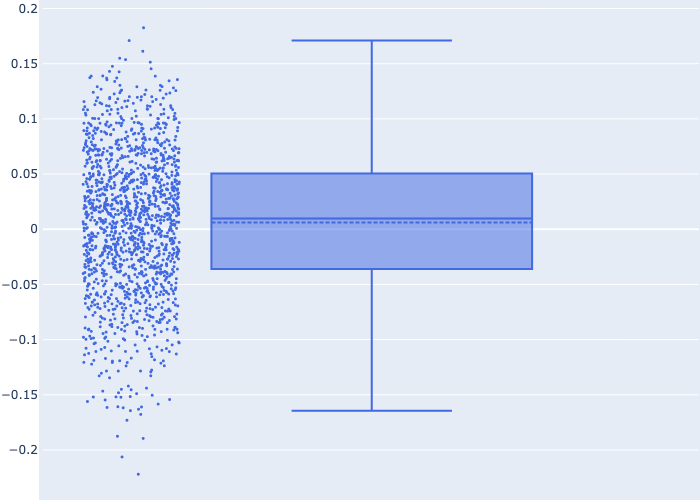

In [64]:
q = 0

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)


layout = Layout(

    autosize=false,

    width=500,

    height=500,

    margin=attr(l=1, r=1, b=1, t=1, pad=4),

)
PlotlyJS.plot(trace,layout)



q=1

k = 297 vs nb edges= 1501
 
mean: 0.0021101282536070574 std: 0.06348300155903554


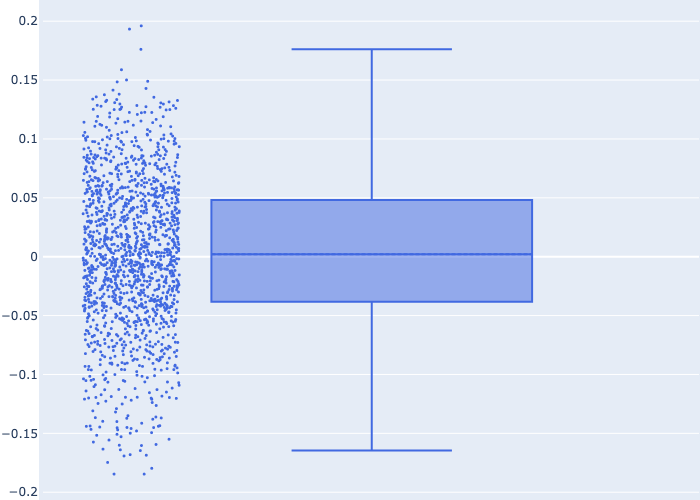

In [74]:
q = 1

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(

    autosize=false,

    width=500,

    height=500,

    margin=attr(l=1, r=1, b=1, t=1, pad=4),

)
PlotlyJS.plot(trace,layout)

Empirical estimates

mean: -4.903591066115733e-5 std: 0.011990776332305343


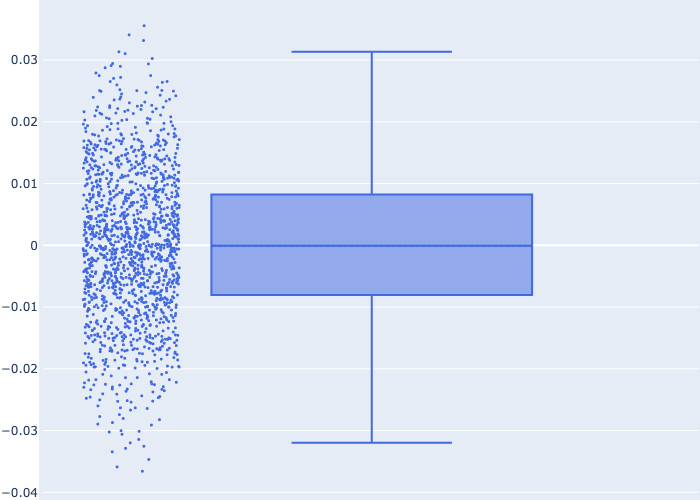

In [75]:
nb_samples = Int(1e5)

q = 0.
name = "emp-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*"nb_samples"*string(nb_samples)

lev = leverage_score(B, q)
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples)

rel_diff = vec((lev-emp_lev)./lev);
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))


trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(

    autosize=false,

    width=500,

    height=500,

    margin=attr(l=1, r=1, b=1, t=1, pad=4),

)
PlotlyJS.plot(trace,layout)

mean: 2.7100319090335143e-5 std: 0.012402655002493757


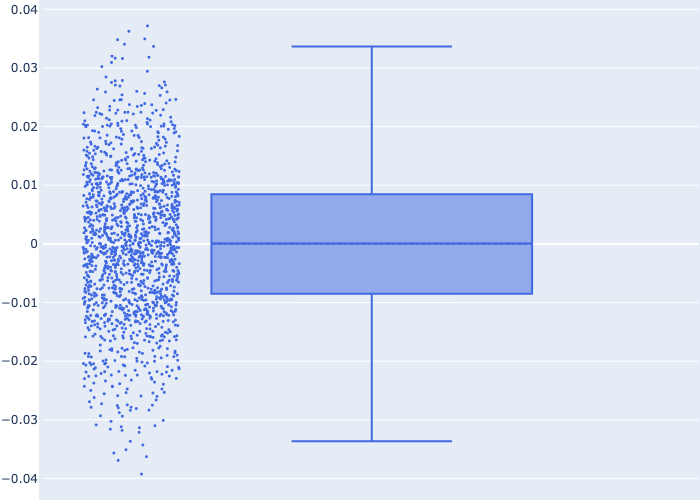

In [76]:
nb_samples = Int(1e5)

q = 1.
name = "emp-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*"nb_samples"*string(nb_samples)

lev = leverage_score(B, q)
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples)

rel_diff = vec((lev-emp_lev)./lev);
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))


trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(

    autosize=false,

    width=500,

    height=500,

    margin=attr(l=1, r=1, b=1, t=1, pad=4),

)
PlotlyJS.plot(trace,layout)